<a href="https://colab.research.google.com/github/mosahle7/ML/blob/main/Fashon_MNIST_using_MobileNetV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Dataset**

In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [4]:
def load_data(batch_size, data_dir = "data"):
  transform = transforms.Compose(
      [transforms.ToTensor(),
       transforms.Normalize((0.5,),(0.5,))]
  )

  trainset = datasets.FashionMNIST(
      data_dir,
      download=True,
      train=True,
      transform=transform
  )

  trainloader = torch.utils.data.DataLoader(
      trainset,
      batch_size = batch_size,
      shuffle = True
  )

  testset = datasets.FashionMNIST(
      data_dir,
      download = True,
      train = False,
      transform = transform
  )

  testloader = torch.utils.data.DataLoader(
      testset,
      batch_size = batch_size,
      shuffle=True
  )

  return trainloader, testloader

trainloader, testloader = load_data(64)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 302kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.63MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.28MB/s]


In [5]:
def get_class_names():
  return [
      "T-shirt/top",
      "Trouser",
      "Pullover",
      "Dress",
      "Coat",
      "Sandal",
      "Shirt",
      "Sneaker",
      "Bag",
      "Ankle boot",
  ]

In [6]:
def get_class_name(class_idx):
  return get_class_names()[class_idx]

In [7]:
def get_class_idx(class_name):
  return get_class_names.index(class_name)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

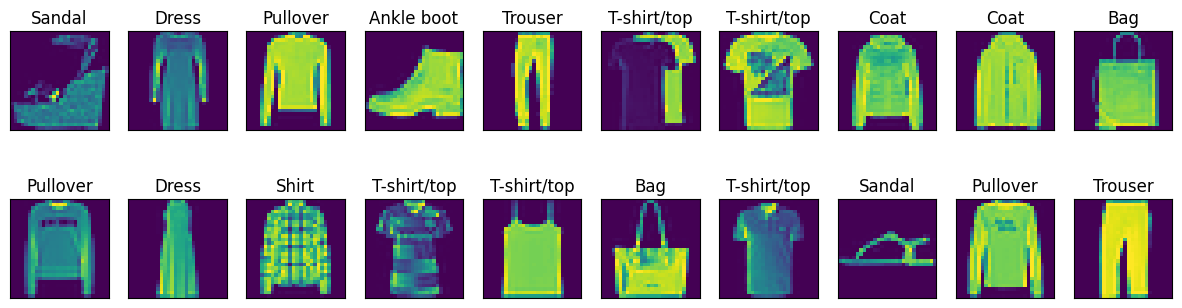

In [15]:
images, labels = next(iter(trainloader))

fig = plt.figure(figsize=(15,4))
plot_size = 20

for ind in np.arange(plot_size):
  ax = fig.add_subplot(2, plot_size // 2, ind + 1, xticks=[], yticks=[])
  imshow(images[ind])
  ax.set_title(get_class_name(int(labels[ind])))

**Model using MobileNetV3**

In [16]:
import torchvision.models as models

In [17]:
mobilenet_v3_model = models.mobilenet_v3_small(pretrained=True)
mobilenet_v3_model

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 39.9MB/s]


MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [18]:
import torch.nn.functional as F
import torchvision.models as models
from torch import nn